# Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotel's primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

# Assumptions

1. No unusual occurences between 2015 and 2017 will have a substantial impact on the data used.
2. The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3. There areno unanticipated negatives to the hotel employing any advised technique.
4. The hotels are not currently using any of the suggested solutions.
5. The biggest factor affecting the effectiveness of earning income is booking cancellations.
6. Cancellations result in vacant rooms for the booked length of time.
7. Clients make hotel reservations the same year they make cancellations.

# Research Question

1. What are the variables that affect hotel reservation cancellations?
2. How can we make hotel reservations cancellations better?
3. How will hotels be assisted in making pricing and promotional decesions?

# Hypothesis

1. More cancellations occur when prices are higher.
2. When there is a longer waitinng list, customers tend to cancel more frequently.
3. The majority of clients are coming from offline travel agents to make their reservations.

# Analysis And Finding

# Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [21]:
# Importing dataset from csv and storing it withinn a data frame 'df'.

df = pd.read_csv('hotel_booking.csv')

In [22]:
# Looking at first 10 rows of data.

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [23]:
# Looking at last 10 rows of data.

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [24]:
# Getting number of row and columns in the data.

df.shape

(119390, 36)

In [25]:
# Getting basic summary of the data.

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [26]:
# Understanding different  columns and their data types,this also gives info about Non null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
# Getting all the columns name in the data.

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [28]:
# Setting 'reservation_status_date' col data type to datetime.

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [29]:
# Checking for the changed data type.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [30]:
# Dropping additional columns.

df = df.drop(['name', 'email','phone-number', 'credit_card'], axis=1)

In [31]:
# Checking each unique values in each 'object data type column.

df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [34]:
# Viewing and inspecting each unique values in each 'object data type column.

for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [35]:
# Checking for missing values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
# Removing agent and company columns and null values.

df.drop(['agent','company'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [37]:
# Re checking for the null values

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [38]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


In [39]:
# Removing outliers

df = df[df['adr']<5000]

## Data Analysis and Visualizations

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


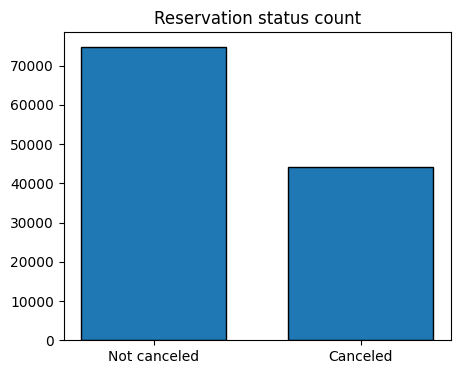

In [40]:
# Checking the cancelled booking percentage.

cancelled_percent = df['is_canceled'].value_counts(normalize = True)
print(cancelled_percent)

plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)
plt.savefig('G1.png')
plt.show()



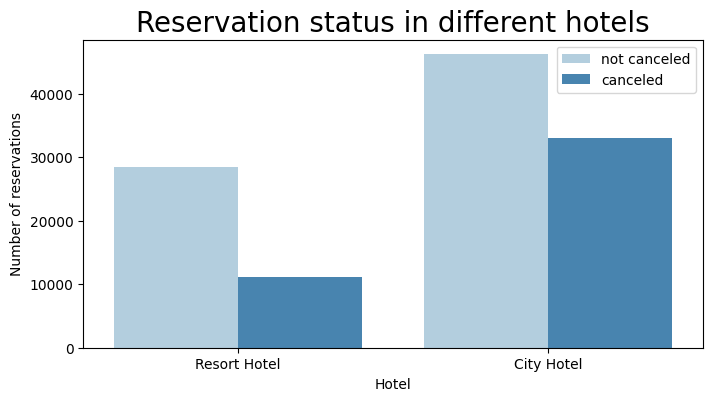

In [41]:
plt.figure(figsize=(8, 4))  # Set the figure size
ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')  # Create countplot
ax1.legend(bbox_to_anchor=(1, 1))  # Move the legend outside the plot (to the top-right corner)
plt.title('Reservation status in different hotels', size=20)  # Set plot title
plt.legend(['not canceled', 'canceled'])
plt.xlabel("Hotel")  # Set x-axis label
plt.ylabel("Number of reservations")  # Set y-axis label
plt.savefig('G2.png')
plt.show()  # Display the plot


In [42]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [43]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

In [44]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

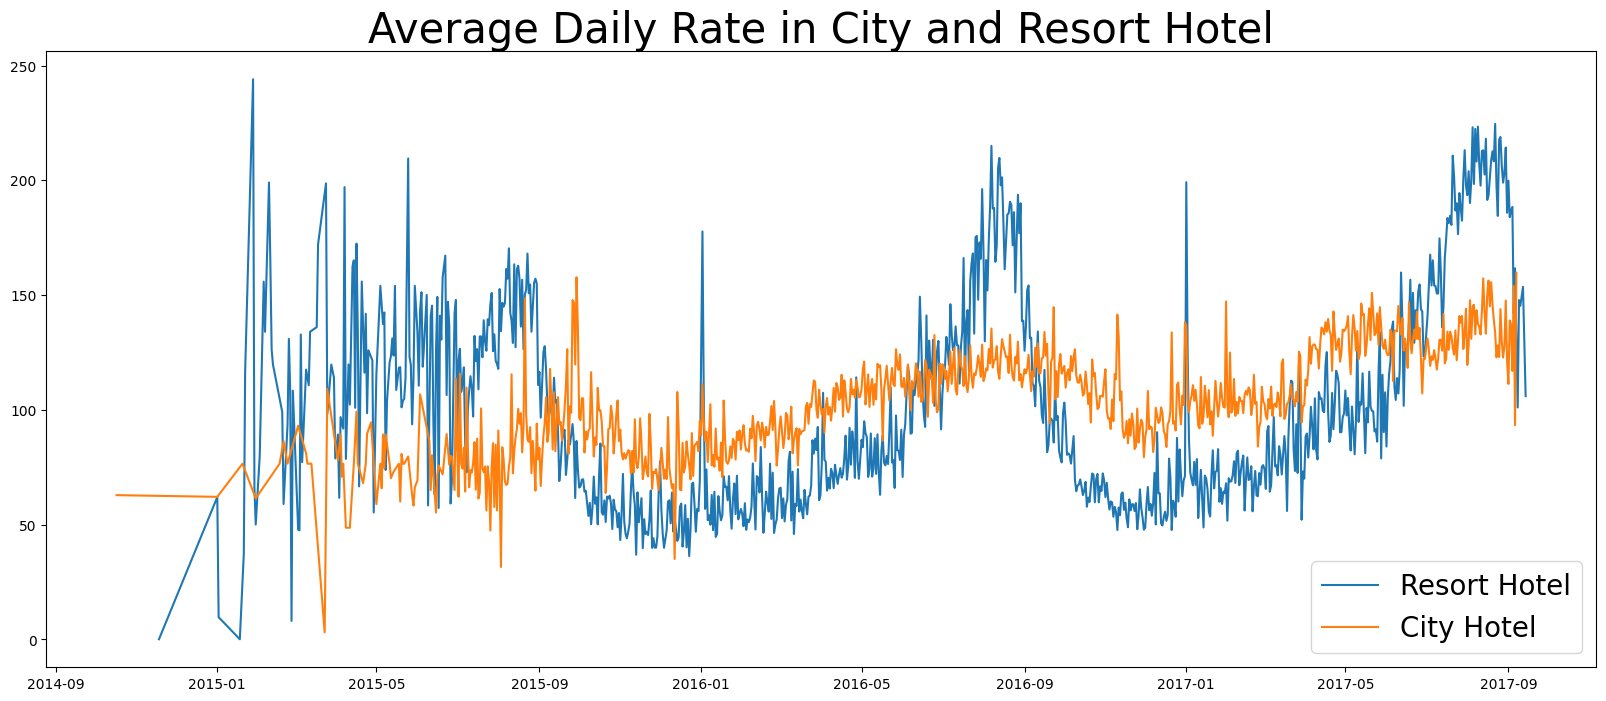

In [45]:
plt.figure(figsize = (20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.savefig('G3.png')
plt.show()

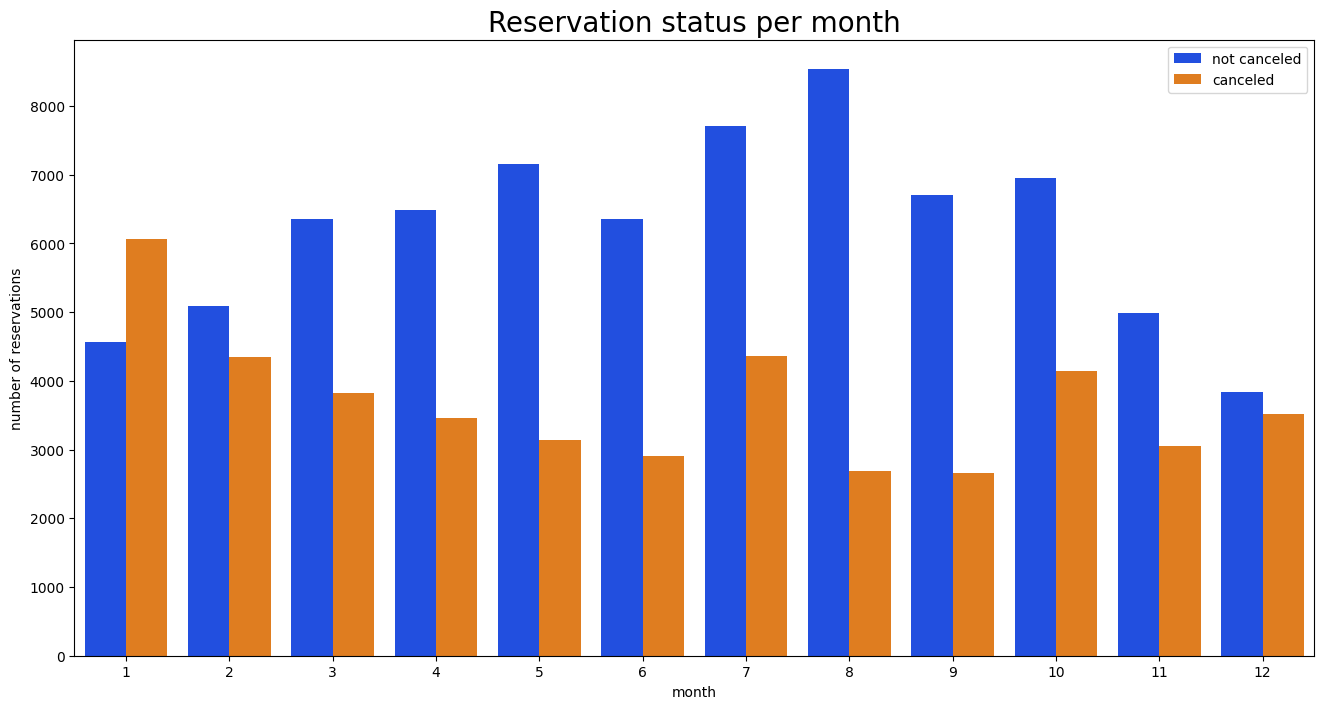

In [46]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16, 8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.savefig('G4.png')
plt.show()

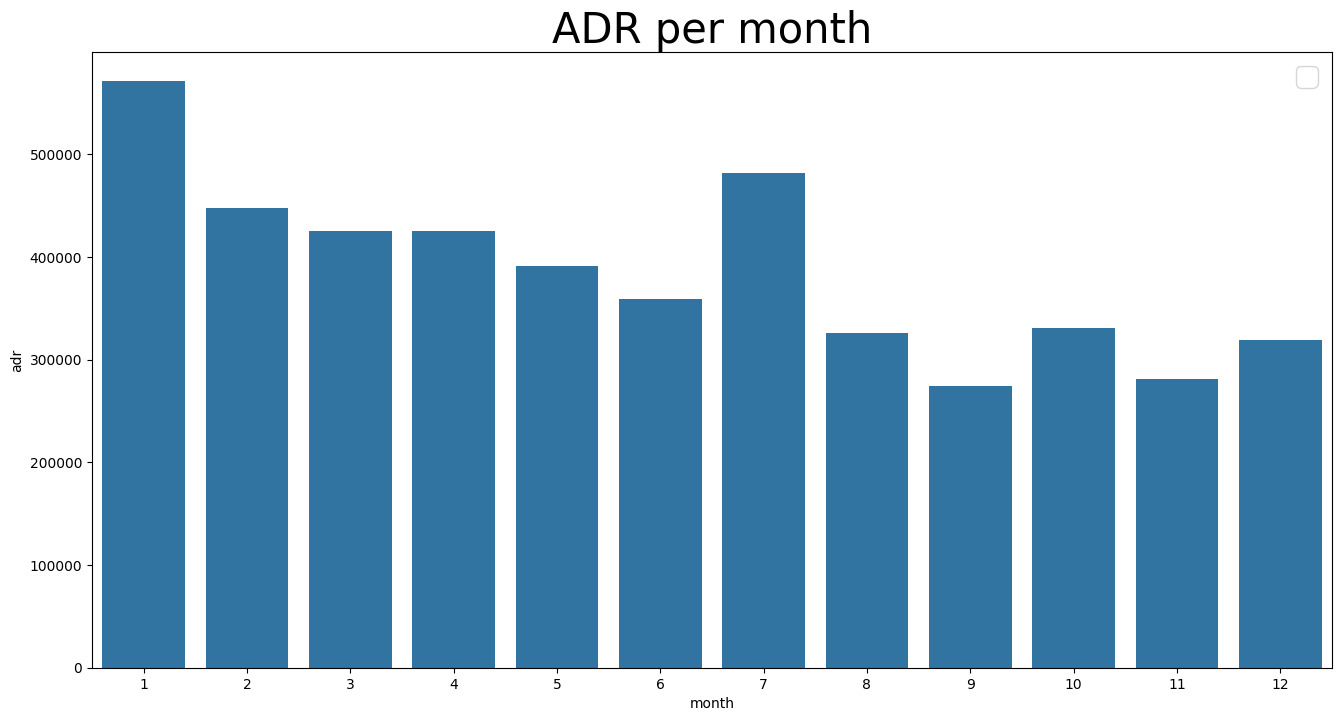

In [47]:
plt.figure(figsize = (16,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot(x = 'month', y = 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize  = 20)
plt.savefig('G5.png')
plt.show()

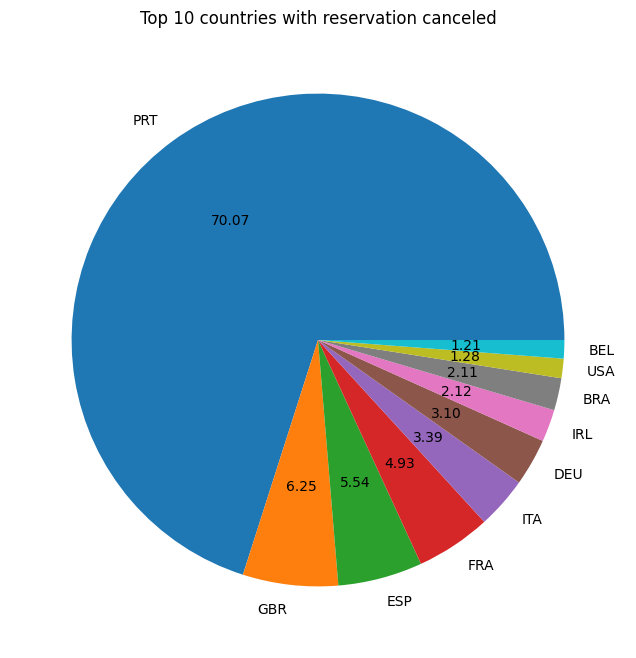

In [48]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8, 8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.savefig('G6.png')
plt.show()

In [54]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [55]:
df['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [56]:
cancelled_data['market_segment'].value_counts(normalize = True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

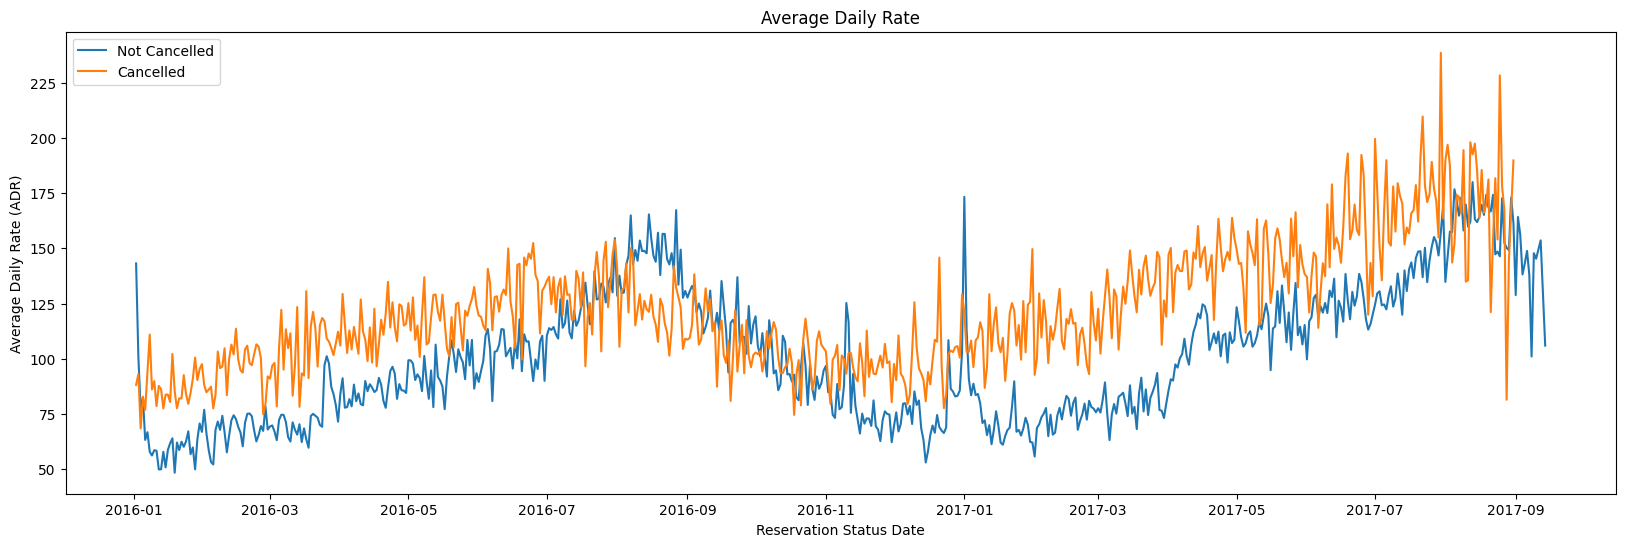

In [61]:
# Handling cancelled bookings
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016')]  
cancelled_df_adr = cancelled_df_adr.groupby('reservation_status_date')[['adr']].mean().reset_index()
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Handling non-cancelled bookings
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data[not_cancelled_data['reservation_status_date'] > '2016']
not_cancelled_df_adr = not_cancelled_df_adr.groupby('reservation_status_date')[['adr']].mean().reset_index()
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plotting
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Cancelled')
plt.legend()
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate (ADR)')
plt.savefig('G7.png')
plt.show()


# Reports

The accompanying bar graph shows the percentage of reservations that are cancelled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservations, which has a significant impact on the hotel's earnings

In comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities.

The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes withoutsaying that weekends and holidays may see a rise in resort hotel rates.

We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen, both the number are confirmed reservations and the number of canceled reservations are largest in the month of August, whereas January is the month with the most canceled reservations.

This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

Now, let's see which country has the highest reservation cancelled. The top country is Portugal with the highest number of cancellations.

Let's check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline Travel Agents? Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.

As seen in the graph, reservations are cancelled when the average daily rate is higher than when it is not cancelled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.

# Suggestions

1. Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.



2. As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.

3. In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.

4. They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.

# Creating Report PDF file.


In [88]:
from fpdf import FPDF
from PIL import Image

# Create an instance of FPDF class
pdf = FPDF()

# Add a page
pdf.add_page()

# Set title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Hotel Booking Cancellation Analysis Report", ln=True, align='C')

# Graph 1: Reservation status count
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 1: Reservation Status Count", ln=True, align='L')
pdf.image('G1.png', x=10, y=40, w=190)
pdf.ln(200)  # Adjust the line break to leave enough space for the graph
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="The bar chart highlights the percentage of canceled and non-canceled reservations. While 37% of customers canceled their bookings, the majority of reservations remained intact, demonstrating significant hotel occupancy retention.")

# Graph 2: Reservation status in different hotels
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 2: Reservation Status in Different Hotels", ln=True, align='L')
pdf.image('G2.png', x=10, y=40, w=190)
pdf.ln(200)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="This graph shows that city hotels have a higher volume of bookings compared to resort hotels. The lower number of bookings in resort hotels could be attributed to their higher pricing or seasonal demand.")

# Graph 3: Average Daily Rate in City and Resort Hotels
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 3: Average Daily Rate in City and Resort Hotels", ln=True, align='L')
pdf.image('G3.png', x=10, y=40, w=190)
pdf.ln(150)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="The line graph illustrates fluctuating average daily rates for both city and resort hotels. Resort hotels tend to show higher rates during weekends and holidays, while city hotels maintain relatively lower rates.")

# Graph 4: Reservation status per month
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 4: Reservation Status per Month", ln=True, align='L')
pdf.image('G4.png', x=10, y=40, w=190)
pdf.ln(200)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="The graph reveals that the highest number of confirmed and canceled reservations occurs in August, while January experiences the highest rate of cancellations, possibly due to seasonal factors.")

# Graph 5: ADR per month
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 5: ADR per Month", ln=True, align='L')
pdf.image('G5.png', x=10, y=40, w=190)
pdf.ln(200)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="This graph shows that cancellations are more frequent when room prices are higher, suggesting that pricing strategies directly impact the likelihood of reservation cancellations.")

# Graph 6: Top 10 countries with reservation canceled
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 6: Top 10 Countries with Reservation Canceled", ln=True, align='L')
pdf.image('G6.png', x=10, y=40, w=190)
pdf.ln(200)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="Portugal leads in the number of reservation cancellations. A large portion of these bookings comes through online travel agencies, followed by group reservations.")

# Graph 7: Average Daily Rate for Canceled and Non-canceled Bookings
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Graph 7: Average Daily Rate for Canceled and Non-canceled Bookings", ln=True, align='L')
pdf.image('G7.png', x=10, y=40, w=190)
pdf.ln(100)
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="The trend in this graph shows that higher average daily rates often result in more cancellations, confirming the link between pricing and reservation behavior.")

# Add suggestions
pdf.add_page()
pdf.set_font("Arial", 'B', 14)
pdf.cell(200, 10, txt="Suggestions:", ln=True, align='L')
pdf.set_font("Arial", size=12)
pdf.multi_cell(0, 10, txt="""1. Hotels should consider adjusting their pricing strategies to reduce cancellations, offering discounts based on location and seasonality.
2. Resort hotels could provide special offers during weekends and holidays to encourage bookings.
3. Marketing campaigns could focus on boosting revenue in January, as it has the highest cancellation rate.
4. Improving service quality in high-cancellation areas, such as Portugal, could help retain bookings.""")

# Output the PDF
pdf.output("Hotel_Booking_Cancellation_Report.pdf")


''